$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge Nº1 | Visualización y pre-procesamiento de datos}$$


- _Jesus Alvarado H._

# A. Introducción

En este taller abordaremos algunas herramientas importantes en la evaluación de datasets moleculares. Iniciaremos por la disponibilidad de los datos (sin profundizar en el filtrado y generación de descriptores), importancia del fenómeno en estudio y la problemática asociada, para luego realizar un análisis exploratorio y preprocesamiento, finalmente evaluaremos de manera superficial algunas métricas y gráficas. Al final de este notebook se explica con detalle los objetivos del challenge y el entregable.

# B. Problemática y disposición de los datos

Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Ejemplo 1:

Podemos analizar información de tablas empleando pandas a partir de la URL. Tomemos el siguiente ejemplo (http://dx.doi.org/10.37761/rsqp.v89i1.425):

In [ ]:
pagina = pd.read_html("http://www.scielo.org.pe/scielo.php?script=sci_arttext&pid=S1810-634X2023000100068&lng=es&nrm=iso&tlng=es")

In [ ]:
tabla = pagina[0]
tabla

,0,1,2,3
0,NaN,Aluminio,Galio,Hierro
1,Número atómico,13,31,26
2,Abundancia (%),NaN,NaN,NaN
3,Universo,0005,1x10-6,011
4,Corteza terrestre,81,00019,63
5,Humanos,-,-,0006
6,Configuración electrónica,NaN,NaN,NaN
7,Neutro,[Ne] 3s2 3p1,[Ar] 3d10 4s2 4p1,[Ar] 3d6 4s2
8,Estado de oxidación 3+,[Ne],[Ar] 3d10,[Ar] 3d5
9,Electronegatividad de,161,181,183


In [ ]:
df = tabla.T
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,NaN,Número atómico,Abundancia (%),Universo,Corteza terrestre,Humanos,Configuración electrónica,Neutro,Estado de oxidación 3+,Electronegatividad de,...,Temperatura de fusión (°C),Densidad (g/cm3),Potencial de electrodo (V),"{E°, Me3+ + 3e- → Me}",Radio iónico trivalente,"(Å), NC=6",Radio covalente en Me3+ (Å),pKa1 del [Me(H2O)6]3+,Log Kps [Me(OH)3],Log β [MeIII-DFO]
1,Aluminio,13,NaN,0005,81,-,NaN,[Ne] 3s2 3p1,[Ne],161,...,66032,27,-166,NaN,054,"0,55 d5 spin bajo",118,499,-335,3611
2,Galio,31,NaN,1x10-6,00019,-,NaN,[Ar] 3d10 4s2 4p1,[Ar] 3d10,181,...,2976,59,-0549,NaN,062,NaN,126,26,-37,3896
3,Hierro,26,NaN,011,63,0006,NaN,[Ar] 3d6 4s2,[Ar] 3d5,183,...,1538,78,077,(Fe3+/Fe2+),"0,65 d5 spin alto",NaN,125,22,-38,4233


In [ ]:
df.iloc[0,:]

0                             NaN
1                  Número atómico
2                  Abundancia (%)
3                        Universo
4               Corteza terrestre
5                         Humanos
6       Configuración electrónica
7                          Neutro
8          Estado de oxidación 3+
9           Electronegatividad de
10                        Pauling
11        I1 / I2 / I3 (kJ mol-1)
12        Conductividad eléctrica
13                          (S/m)
14                 Tipo magnético
15     Temperatura de fusión (°C)
16               Densidad (g/cm3)
17     Potencial de electrodo (V)
18          {E°, Me3+ + 3e- → Me}
19        Radio iónico trivalente
20                      (Å), NC=6
21    Radio covalente en Me3+ (Å)
22          pKa1 del [Me(H2O)6]3+
23              Log Kps [Me(OH)3]
24              Log β [MeIII-DFO]
Name: 0, dtype: object

In [ ]:
df.iloc[1,1]

'13'

Text(0, 0.5, 'Z')

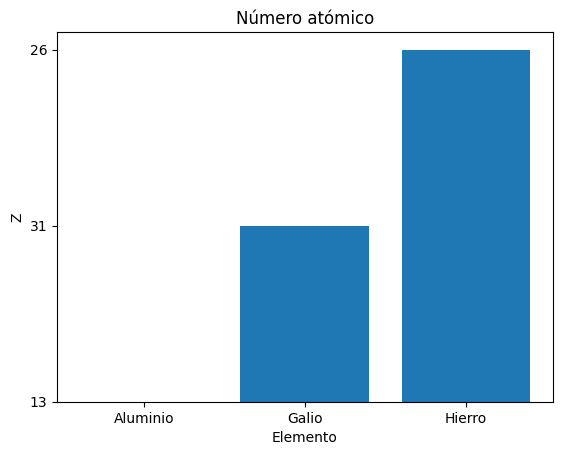

In [ ]:
plt.title("Número atómico")
plt.bar(df.iloc[1:4,0],df.iloc[1:4,1])
plt.xlabel("Elemento")
plt.ylabel("Z")

<BarContainer object of 3 artists>

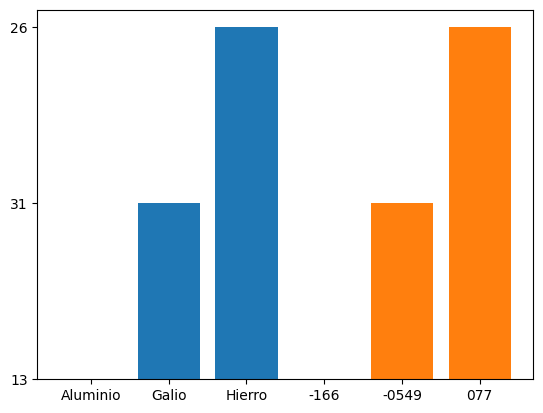

In [ ]:
#plt.title("Número atómico")
plt.bar(df.iloc[1:4,0],df.iloc[1:4,1])
plt.bar(df.iloc[1:4,17],df.iloc[1:4,1])
#plt.xlabel("Elemento")
#plt.ylabel("Z")

<BarContainer object of 3 artists>

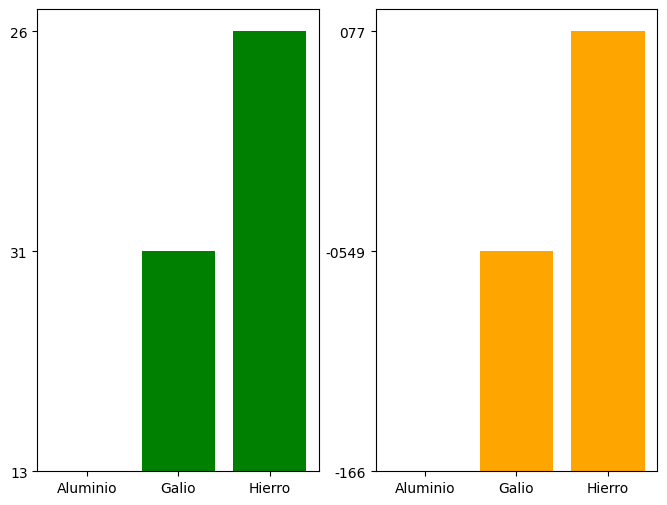

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)

ax[0].bar(df.iloc[1:4,0],df.iloc[1:4,1],color="green")
ax[1].bar(df.iloc[1:4,0],df.iloc[1:4,17],color="orange")

In [ ]:
df.drop(index = 0, inplace= True)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
1,Aluminio,13,NaN,0005,81,-,NaN,[Ne] 3s2 3p1,[Ne],161,...,66032,27,-166,NaN,054,"0,55 d5 spin bajo",118,499,-335,3611
2,Galio,31,NaN,1x10-6,00019,-,NaN,[Ar] 3d10 4s2 4p1,[Ar] 3d10,181,...,2976,59,-0549,NaN,062,NaN,126,26,-37,3896
3,Hierro,26,NaN,011,63,0006,NaN,[Ar] 3d6 4s2,[Ar] 3d5,183,...,1538,78,077,(Fe3+/Fe2+),"0,65 d5 spin alto",NaN,125,22,-38,4233


## Ejemplo 2:

Queremos disponer de todos los SMILES contenidos en https://perunpdb.com.pe/

In [ ]:
# Realiza web scrapping para obtener estas representaciones moleculares en un dataframe
# https://github.com/inefable12/herramientas_basicas/blob/main/webscrapping2023_Selenium.ipynb

In [ ]:
# SMILES: https://github.com/inefable12/herramientas_basicas/blob/main/perunpdb1.csv
# Matriz X (sideróforos filtrados): https://github.com/inefable12/Exploracion_insilico_2024/blob/main/catecol_complementario/padel_83_1490.csv
# Target Y: https://github.com/inefable12/Exploracion_insilico_2024/blob/main/catecol_complementario/FEB_catechol83.csv

## Ejemplo 3:

A partir de nuestra base de datos formada por compuestos químicos provenientes de 17 plantas de Puno y experimentos in silico (acoplamiento molecular) con una de las proteínas de interés farmacológico en el SARS-CoV-2, la proteasa principal, queremos conocer la distribución de los valores de energía de acoplamiento (docking score) respecto de cada planta en boxplots.

In [ ]:
df0 = pd.read_csv("https://raw.githubusercontent.com/inefable12/upch_rp_2023/main/MDG202_cl2.csv",index_col="CID")
df0.head(3)

,NUMBER,PLANT,NAME,IUPAC,ISOMERIC_SMILES,SMILES
CID,,,,,,
5280343,1,Baccharis trimera,Quercetin,"2- (3,4-dihidroxifenil) -3,5,7-trihidroxicrome...",NaN,C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
5280445,2,Baccharis trimera,Luteolin,"2- (3,4-dihidroxifenil) -5,7-dihidroxicromen-4...",NaN,O=C1C=C(C2=CC=C(O)C(O)=C2)OC3=CC(O)=CC(O)=C13
5317284,3,Baccharis trimera,Nepetin,"2- (3,4-dihidroxifenil) -5,7-dihidroxi-6-metox...",NaN,O=C1C=C(C2=CC=C(O)C(O)=C2)OC3=CC(O)=C(OC)C(O)=C13


In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/inefable12/upch_rp_2023/main/mdg_glide_score2023_cl2.csv",index_col="CID",sep=";")
df1.head(3)

,docking score
CID,
5318767,-8.53
5280805,-8.11
5282159,-7.98


In [ ]:
df = df0.merge(df1, how='inner', left_index=True, right_index=True)

In [ ]:
df.shape

(179, 7)

In [ ]:
df['PLANT'].values

array([nan, 'Baccharis latifolia', 'Aloysia triphylla',
       'Buddleja globosa', 'Aloysia triphylla', 'Capsella bursa ',
       'Buddleja globosa', 'Capsella bursa ', 'Capsella bursa ',
       'Buddleja globosa', 'Brugmancia andida', 'Baccharis latifolia',
       'Aloysia triphylla', 'Brugmancia andida', 'Baccharis latifolia',
       'Baccharis latifolia', 'E. tlocktoniae', 'E. maculata',
       'Baccharis latifolia', 'Buddleja globosa', 'Aloysia triphylla',
       'Brugmancia andida', 'Buddleja globosa', 'Minthostachys mollis',
       'Capsella bursa ', 'Baccharis latifolia', 'Buddleja globosa',
       'Buddleja globosa', 'Leucheria daucifolia', 'Brugmancia andida',
       'E. sieberi', 'Aloysia triphylla', 'Brugmancia andida',
       'Brugmancia andida', 'Baccharis latifolia', 'Leucheria daucifolia',
       'Leucheria daucifolia', 'Buddleja globosa', 'Capsella bursa ',
       'Brugmancia andida', 'Aloysia triphylla', 'Buddleja globosa',
       'Bidens andicola', 'Aloysia triphylla'

In [ ]:
df['PLANT'].unique()

array([nan, 'Baccharis latifolia', 'Aloysia triphylla',
       'Buddleja globosa', 'Capsella bursa ', 'Brugmancia andida',
       'E. tlocktoniae', 'E. maculata', 'Minthostachys mollis',
       'Leucheria daucifolia', 'E. sieberi', 'Bidens andicola',
       'Bidens pilosa', 'Cinchona officinalis', 'E. sideroxylon',
       'E. amaldulensis', 'Baccharis trimera', 'E. alophylla'],
      dtype=object)

In [ ]:
df['PLANT'] = np.where(df['PLANT']=='Capsella bursa ','Capsella bursa',df['PLANT'])

In [ ]:
list(df.columns)

['NUMBER',
 'PLANT',
 'NAME',
 'IUPAC',
 'ISOMERIC_SMILES',
 'SMILES',
 'docking score']

In [ ]:
df.drop(['NAME','IUPAC','ISOMERIC_SMILES','NUMBER','SMILES'],inplace=True,axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(178, 2)

In [ ]:
df

,PLANT,docking score
CID,,
10104370,Baccharis latifolia,-5.41
101629835,Aloysia triphylla,-5.64
10248,Buddleja globosa,-5.58
10398656,Aloysia triphylla,-5.66
10465,Capsella bursa,-1.50
...,...,...
93081,Buddleja globosa,-6.21
932,E. maculata,-7.52
94254,Buddleja globosa,-4.88


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop_duplicates(subset=['CID'], keep='first', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 177
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CID            140 non-null    object 
 1   PLANT          140 non-null    object 
 2   docking score  140 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.4+ KB


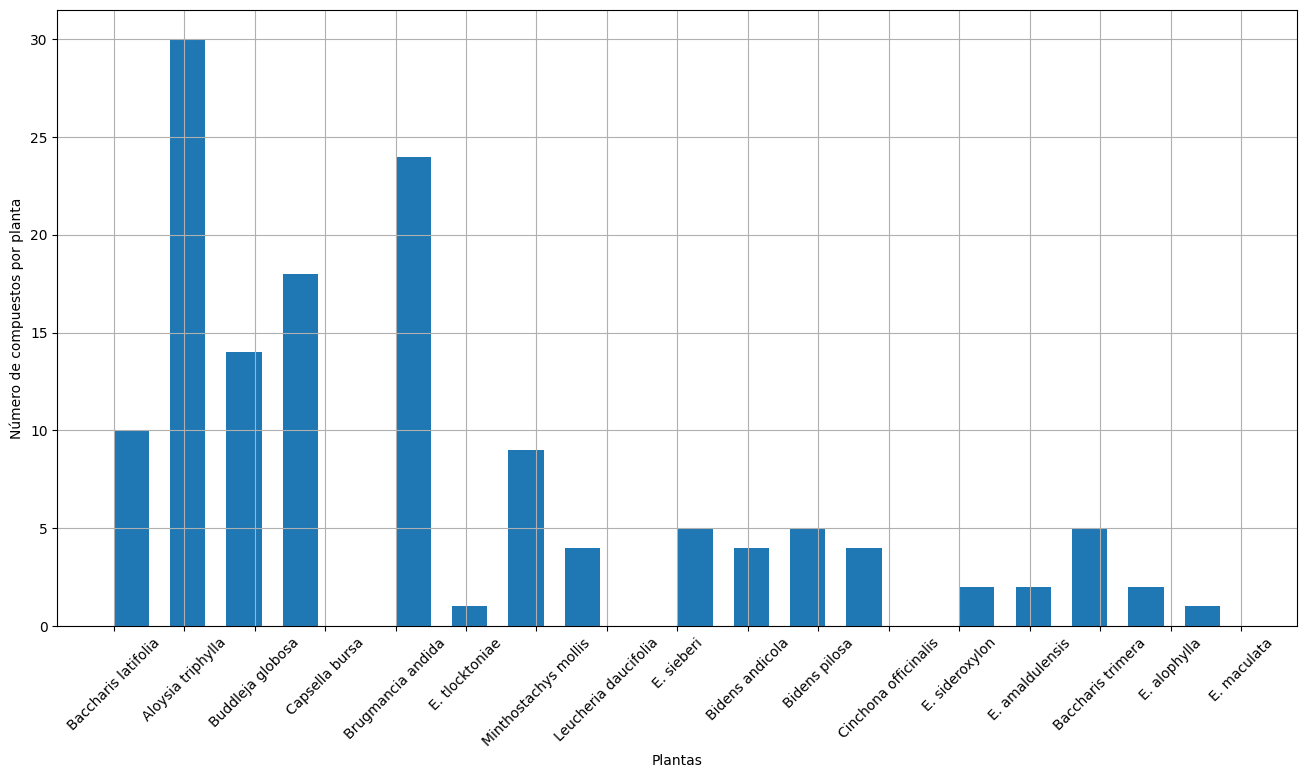

In [ ]:
ax = plt.subplot()
df['PLANT'].hist(figsize=(16,8),bins=20,width=0.5)
plt.xticks(rotation=45)
plt.xlabel('Plantas')
plt.ylabel('Número de compuestos por planta')
plt.show()

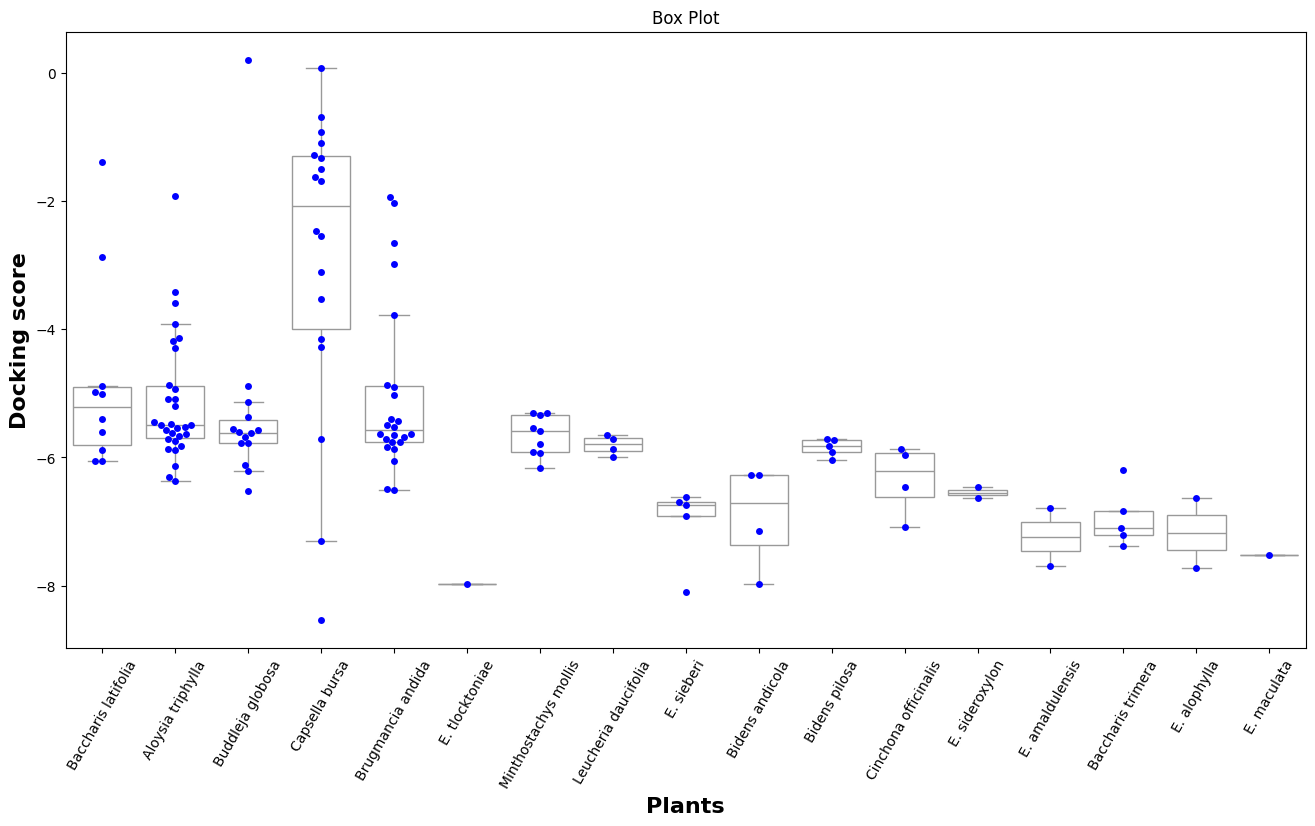

In [ ]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(16, 8))

###
ax = sns.boxplot(x='PLANT', y='docking score', data=df, ax=fig.add_subplot(1,1,1), showfliers=False, color='white')
sns.swarmplot(x='PLANT', y='docking score', data=df, ax=ax, color='blue', size=5)
###

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Agregar título de gráfica y etiquetas de eje
plt.title('Box Plot')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel('Plants', fontsize=16, fontweight='bold')
plt.ylabel('Docking score', rotation=90, fontsize=16, fontweight='bold')

# Mostrar la gráfica
plt.show();


# C. Análisis Exploratorio de los Datos (EDA)

In [ ]:
# BD de cancer
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/C0708_Reconocimiento_Patrones_2024/main/cancer_challenge_cl2.csv", index_col=0)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,-1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0


# Conociendo la data:
1. ¿Cuántos datos hay?
2. ¿Qué atributos tenemos?
3. ¿Qué tipos de datos tenemos?
4. ¿Tenemos valores faltantes?
5. ¿Cómo están distribuidos los datos?
6. ¿Hay valores extraños?
7. ¿Qué información tiene el target?
8. ¿Cuales y cuantas etiquetas tiene?
9. ¿Cómo están correlacionados los datos?
10. ¿Son útiles los datos correlacionados?

In [ ]:
#

# D. Preprocesamiento

1. Tratamiento de datos outliers
2. Normalización de la data

# E. Screening de ML

In [ ]:
# Sugerencia: lazypredict o pycaret

In [ ]:
# Ejemplo complementario
# https://colab.research.google.com/drive/1jntqMDjquG7j2sC-W-koWTaaQLrPnZ5T?authuser=7&pli=1#scrollTo=xZo2J8hRSy72

# F. Challenge

**Problemática**:

Existen moléculas con capacidad de permear a la membrana celular, esta es una característica importante en el desarrollo de fármacos. Sin embargo, en las células existen canales (proteínas) que permiten la entrada de moléculas específicas que no dependen de esta capacidad. Por ejemplo, la proteína FoxA, situada en la membrana bacterial, se "encarga" de la entrada de hierro (Fe3+).
Este metal es altamente reactivo, por lo cual, se encuentra "protegido" por una molécula orgánica, llamada sideróforo, producida por las mismas bacterias. Los microorganismos reconocen químicamente el sideróforo y se inicia la internalización del hierro-sideróforo a través del canal. La imitación de sideróforos es una vía ampliamente usada para el descubrimiento de nuevos fármacos con limitada capacidad de permeabilidad celular.

En el laboratorio desarrollamos una base de datos para cuantificar el reconocimiento molecular de hierro-sideróforos (ligando) en FoxA (receptor):
https://github.com/inefable12/fedfo_720/blob/main/FULLc.csv

FEBc (Free Energy Binding) es un indicador de la afinidad entre el ligando y el receptor. Cuanto más negativo FEBc, es mayor la afinidad.

**Objetivos**:

General: Aplicar EDA y preprocesamiento del dataset para la predicción de FEBc.

Específicos:

1. Identificar el tipo de modelo (agrupamiento, regresion, clasificacion, etc)
2. Justificar cada paso del EDA, destacando la utilidad de la información obtenida.
3. Realizar preprocesamiento a los datos
4. Realizar un screening de modelos de ML (pycaret, lazy predict, etc)
5. Analizar las métricas
6. Conclusiones.

## **Desarrollo:**

1. Identificar el tipo de modelo (agrupamiento, regresion, clasificacion, etc)

En este caso, se emplearía el modelo de regresión, el cuál se emplea para predecir valores numéricos basándose en datos previos. Consiste en establecer una relación entre una o más variables independientes (también llamadas características o atributos) y una variable dependiente (la que queremos predecir / target).

En este caso en particular, el target sería FEBc y los atributos relacionados aún deben ser evaluados.

2. Justificar cada paso del EDA, destacando la utilidad de la información obtenida.

In [ ]:
# URL cruda del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/inefable12/fedfo_720/main/FULLc.csv"

# Realizamos el análisis de los datos
df = pd.read_csv(url)
df.head(10)


,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Beta_LUMO_Energy,r_mopac_Beta_SOMO_Energy,r_mopac_Dipole,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,r_mopac_Ionization_Energy,r_mopac_MOPAC_Heat_of_Formation,...,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,FEBc
0,-3.97,-9.47,-3.97,-9.44,40.43,0.15,-38.41,12.61,9.44,-221.86,...,8072.41,11998.09,0.40,0.67,4.49,0.00,0.92,0.25,0.13,-8.60
1,-4.06,-9.47,-4.06,-9.80,39.06,-3.59,33.12,20.39,9.47,-222.34,...,7660.67,11831.01,0.42,0.65,4.45,0.00,0.91,0.24,0.14,-8.90
2,-3.96,-9.60,-3.96,-9.97,38.68,-11.33,-29.60,-22.18,9.59,-224.24,...,21162.26,24784.72,0.18,0.85,6.38,0.00,0.98,0.56,0.07,-6.50
3,-2.69,-10.85,-2.68,-10.77,11.91,3.25,-9.45,6.48,10.77,-264.35,...,7353.41,11011.69,0.48,0.67,4.38,0.00,0.88,0.18,0.22,-9.20
4,-2.56,-10.66,-2.59,-11.07,13.12,-5.02,-7.40,-9.60,10.66,-257.23,...,8614.70,12008.48,0.41,0.72,4.54,0.00,0.91,0.24,0.19,-10.90
5,-2.45,-10.01,-2.44,-10.14,26.48,-7.64,-25.27,2.02,10.01,-256.86,...,8635.63,12401.41,0.37,0.70,4.55,0.00,0.93,0.28,0.13,-10.50
6,-4.04,-9.54,-4.04,-9.87,40.72,-0.61,34.84,-21.07,9.54,-222.09,...,15903.67,19993.00,0.28,0.80,5.79,0.00,0.96,0.39,0.14,-7.00
7,-2.39,-10.75,-2.41,-11.03,12.09,-5.06,-5.31,-9.62,10.75,-275.68,...,12690.66,17799.24,0.33,0.71,5.42,0.00,0.95,0.33,0.09,-10.60
8,-3.61,-11.31,-3.50,-11.31,13.01,1.54,-5.37,11.75,11.31,-266.92,...,12436.04,16984.73,0.33,0.73,5.33,0.00,0.94,0.32,0.11,-8.90
9,-2.66,-10.61,-2.65,-10.73,17.48,0.77,-11.72,12.95,10.61,-255.28,...,12846.11,17782.75,0.32,0.72,5.42,0.00,0.95,0.34,0.08,-8.70


In [ ]:
# Para obtener información básica del DataFrame y un breve análisis estadístico:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   r_mopac_Alpha_LUMO_Energy        720 non-null    float64
 1   r_mopac_Alpha_SOMO_Energy        720 non-null    float64
 2   r_mopac_Beta_LUMO_Energy         720 non-null    float64
 3   r_mopac_Beta_SOMO_Energy         720 non-null    float64
 4   r_mopac_Dipole                   720 non-null    float64
 5   r_mopac_Dipole_X                 720 non-null    float64
 6   r_mopac_Dipole_Y                 720 non-null    float64
 7   r_mopac_Dipole_Z                 720 non-null    float64
 8   r_mopac_Ionization_Energy        720 non-null    float64
 9   r_mopac_MOPAC_Heat_of_Formation  720 non-null    float64
 10  r_mopac_MOPAC_Total_Energy_EV    720 non-null    float64
 11  i_desc_Chirality_count           720 non-null    int64  
 12  PBF                   

,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Beta_LUMO_Energy,r_mopac_Beta_SOMO_Energy,r_mopac_Dipole,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,r_mopac_Ionization_Energy,r_mopac_MOPAC_Heat_of_Formation,...,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,FEBc
count,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,...,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00
mean,-3.35,-10.27,-3.37,-10.39,25.44,-0.04,0.84,-0.23,10.21,-242.12,...,11071.35,14358.12,0.37,0.72,4.81,0.00,0.89,0.29,0.18,-9.31
std,0.67,0.73,0.68,0.66,12.83,7.78,22.43,15.74,0.68,23.82,...,6992.20,6582.05,0.14,0.15,1.15,0.00,0.15,0.18,0.08,1.63
min,-4.22,-11.96,-4.36,-11.77,1.07,-20.08,-42.87,-33.70,8.82,-298.51,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-13.50
25%,-4.00,-10.94,-4.01,-11.08,13.15,-4.83,-18.77,-12.81,9.57,-264.95,...,7502.53,11134.45,0.32,0.66,4.39,0.00,0.88,0.19,0.12,-10.30
50%,-3.58,-10.07,-3.74,-10.16,24.57,0.01,0.82,-0.52,10.02,-231.23,...,8226.45,11857.02,0.42,0.71,4.51,0.00,0.91,0.23,0.17,-9.60
75%,-2.67,-9.58,-2.69,-9.81,38.13,4.62,21.88,12.21,10.86,-223.14,...,11856.25,16302.91,0.47,0.76,5.23,0.00,0.94,0.31,0.22,-8.30
max,-2.02,-9.13,-2.00,-8.82,46.41,20.45,40.95,33.94,11.77,-171.37,...,43196.78,44006.82,0.62,1.00,8.57,0.00,1.00,0.89,0.52,-3.50


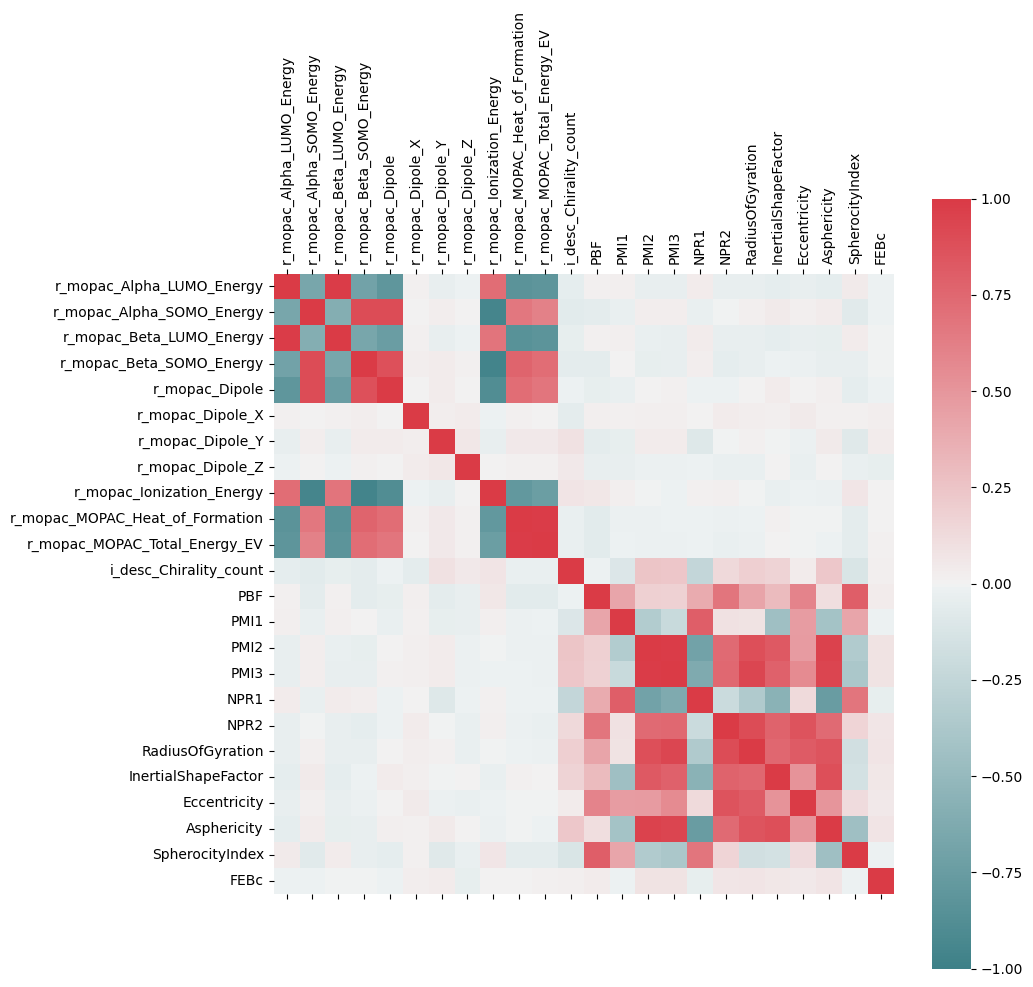

In [ ]:
# Entonces, para determinar la relevancia de cada parámetro realizamos una matriz de correlación: Si dos variables tienen una correlación cercana a 1, sugiere una fuerte relación lineal entre ellas.
# Por lo que puede ser redundante mantener ambas variables en el conjunto de datos, ya que una variable puede explicar casi completamente la variación de la otra, por lo que se considera eliminar una.

# Representación visual de cómo las variables se relacionan entre sí
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(24323, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

Asismo analizamos la distribución de los datos de cada categoría:


In [ ]:
# Extraer la primera fila como etiquetas para facilitar el manejo de gráficos:
titles = df.columns.tolist()
titles.pop() # Eliminamos el último elemento, pues no evaluaremos el target
print(titles)

['r_mopac_Alpha_LUMO_Energy', 'r_mopac_Alpha_SOMO_Energy', 'r_mopac_Beta_LUMO_Energy', 'r_mopac_Beta_SOMO_Energy', 'r_mopac_Dipole', 'r_mopac_Dipole_X', 'r_mopac_Dipole_Y', 'r_mopac_Dipole_Z', 'r_mopac_Ionization_Energy', 'r_mopac_MOPAC_Heat_of_Formation', 'r_mopac_MOPAC_Total_Energy_EV', 'i_desc_Chirality_count', 'PBF', 'PMI1', 'PMI2', 'PMI3', 'NPR1', 'NPR2', 'RadiusOfGyration', 'InertialShapeFactor', 'Eccentricity', 'Asphericity', 'SpherocityIndex']


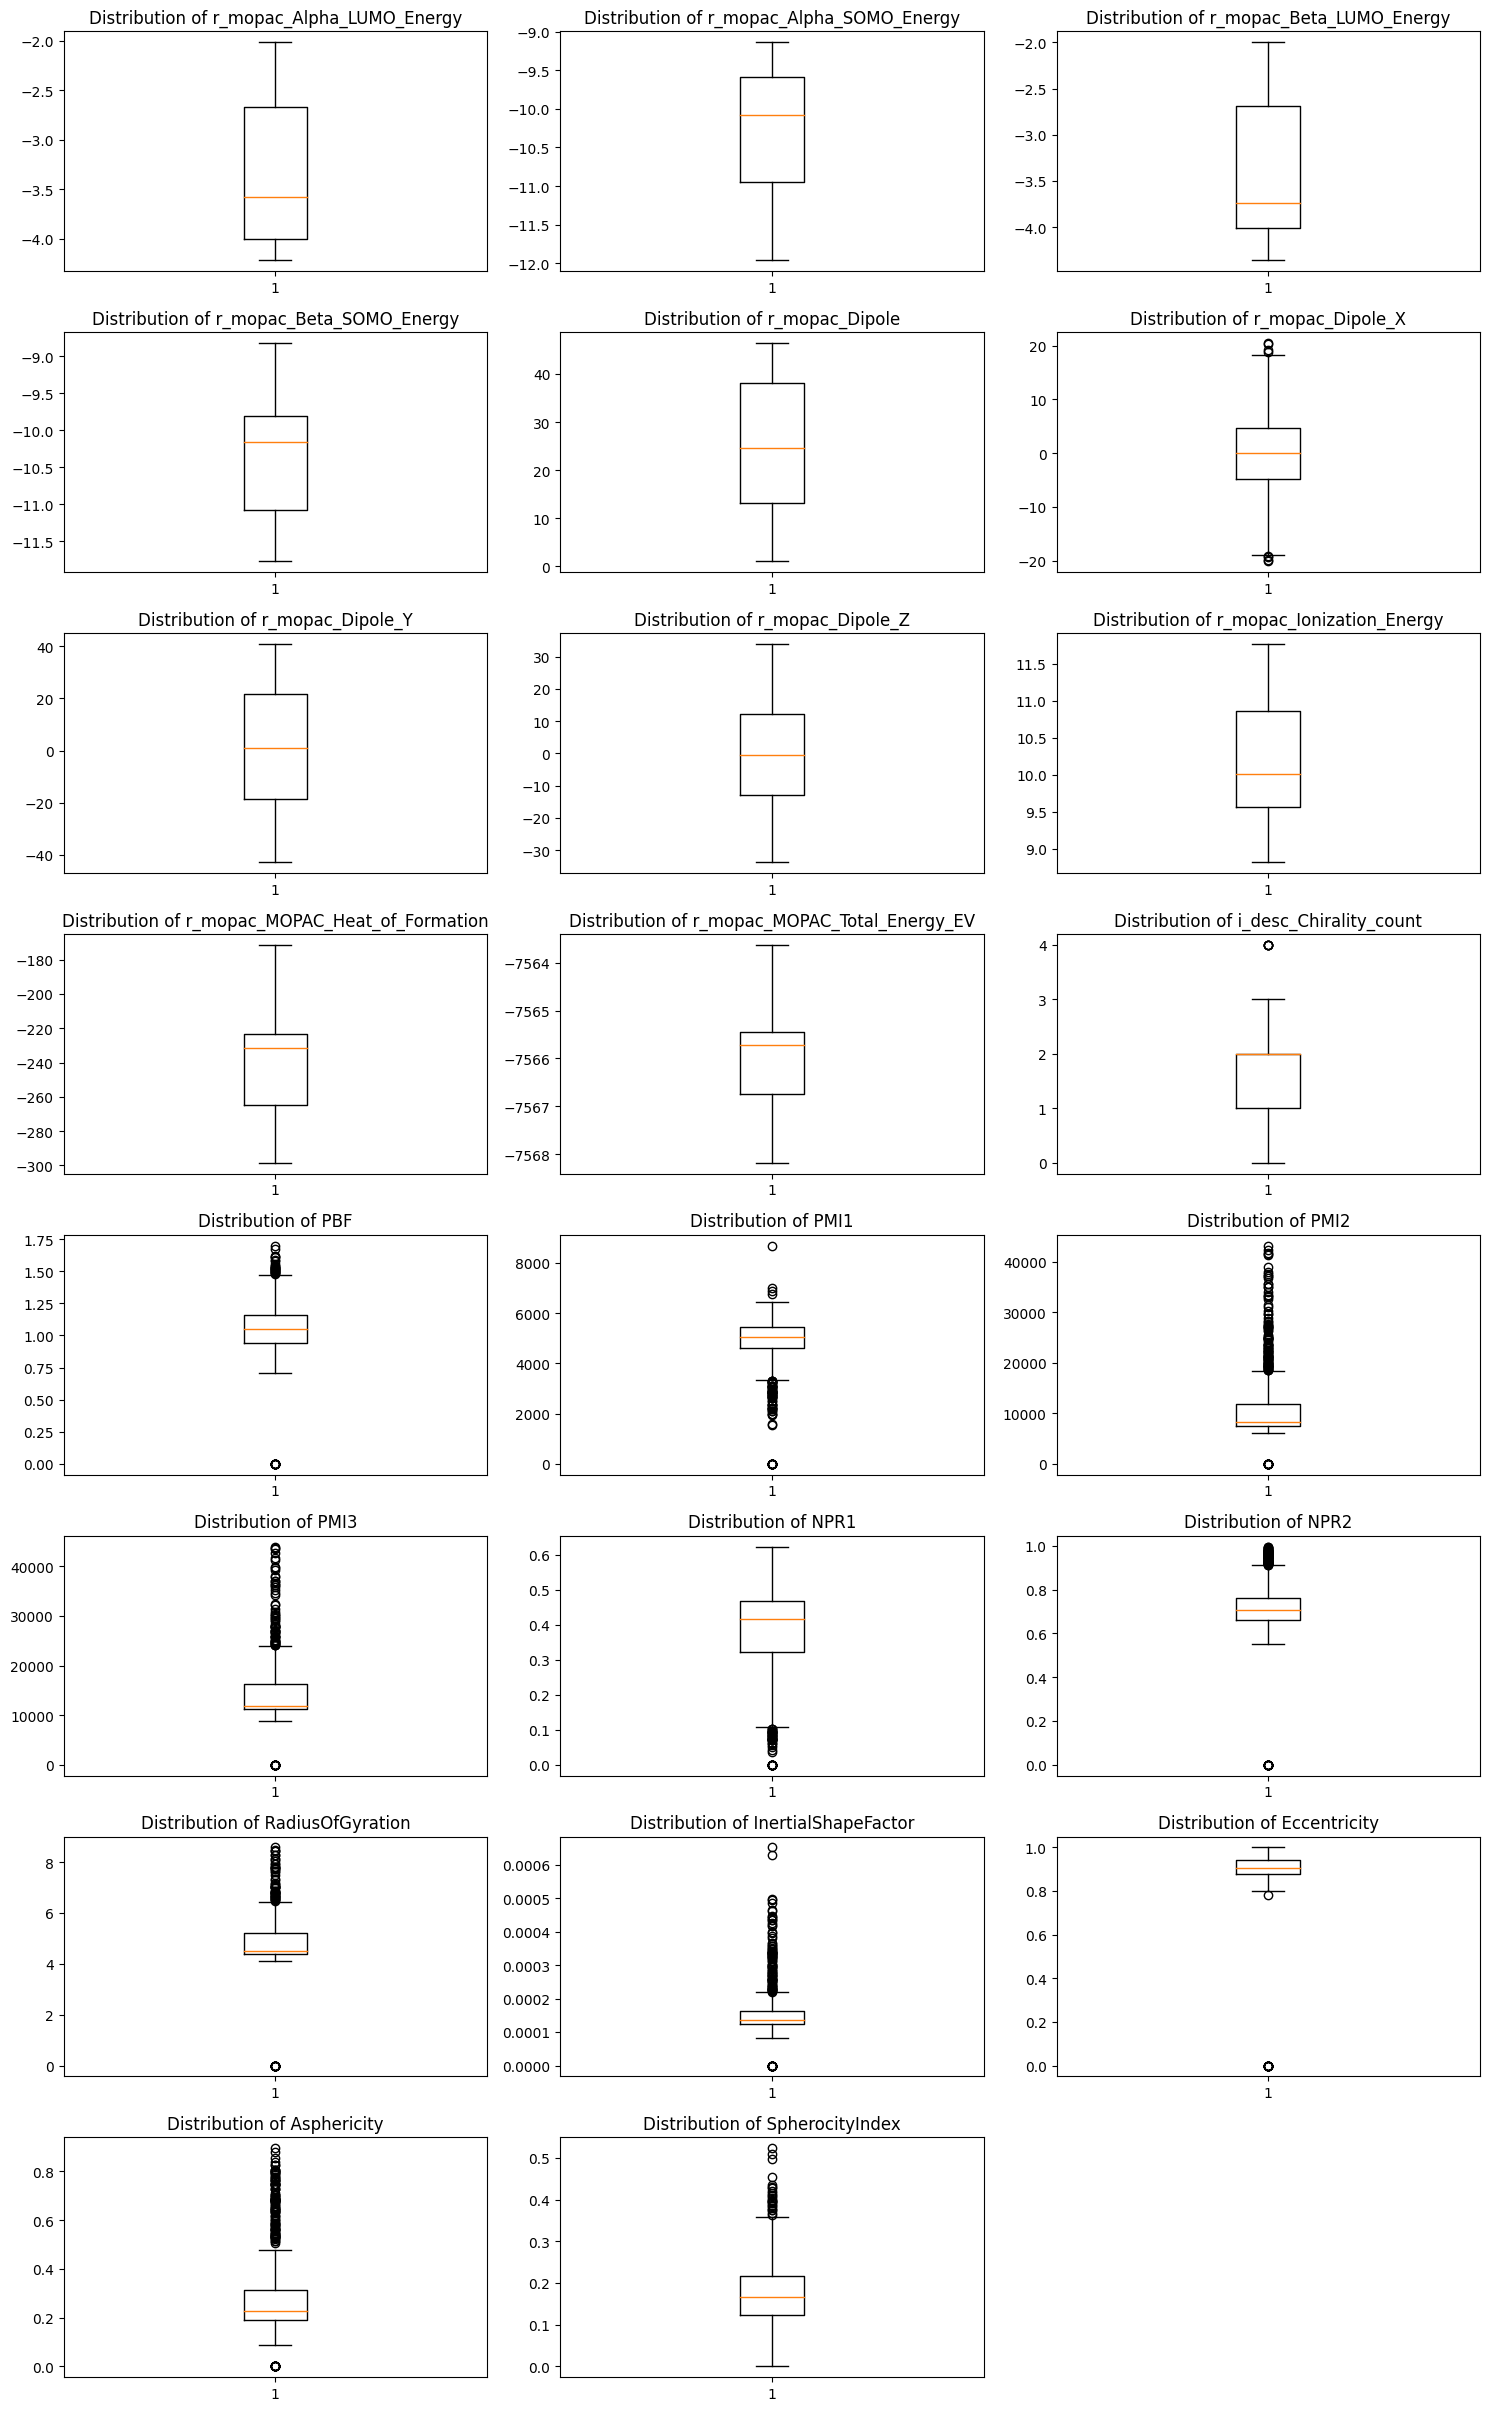

In [ ]:
# Ploteo de diagramas de caja y bigotes, incluyendo los casos atípicos
plt.figure(figsize=(15,30))
count = 1
for feature in titles:
    plt.subplot(10, 3, count)
    plt.boxplot(df[feature])
    plt.title(('Distribution of ' + feature))
    count += 1

plt.tight_layout()
plt.show()

En este caso, convendría retirar las siguientes columnas para evitar la redundancia: r_mopac_Beta_LUMO_Energy, r_mopac_Alpha_SOMO_Energy, r_mopac_Beta_SOMO_Energy,  r_mopac_MOPAC_Total_Energy_EV, PBF, PMI2, NPR2, RadiusOfGyration, Asphericity

3. Realizar el Pre-procesamiento de datos

In [ ]:
columnas_a_eliminar = ['r_mopac_Beta_LUMO_Energy', 'r_mopac_Alpha_SOMO_Energy', 'r_mopac_Beta_SOMO_Energy','r_mopac_MOPAC_Total_Energy_EV', 'PBF', 'PMI2','NPR2','RadiusOfGyration', 'Asphericity']

# Eliminar las columnas con los nombres especificados
df_clean = df.drop(columnas_a_eliminar, axis=1)
df_clean.head(10)

,r_mopac_Alpha_LUMO_Energy,r_mopac_Dipole,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,r_mopac_Ionization_Energy,r_mopac_MOPAC_Heat_of_Formation,i_desc_Chirality_count,PMI1,PMI3,NPR1,InertialShapeFactor,Eccentricity,SpherocityIndex,FEBc
0,-3.97,40.43,0.15,-38.41,12.61,9.44,-221.86,3,4811.76,11998.09,0.40,0.00,0.92,0.13,-8.60
1,-4.06,39.06,-3.59,33.12,20.39,9.47,-222.34,2,5008.53,11831.01,0.42,0.00,0.91,0.14,-8.90
2,-3.96,38.68,-11.33,-29.60,-22.18,9.59,-224.24,1,4434.49,24784.72,0.18,0.00,0.98,0.07,-6.50
3,-2.69,11.91,3.25,-9.45,6.48,10.77,-264.35,2,5285.94,11011.69,0.48,0.00,0.88,0.22,-9.20
4,-2.56,13.12,-5.02,-7.40,-9.60,10.66,-257.23,3,4870.11,12008.48,0.41,0.00,0.91,0.19,-10.90
5,-2.45,26.48,-7.64,-25.27,2.02,10.01,-256.86,0,4593.34,12401.41,0.37,0.00,0.93,0.13,-10.50
6,-4.04,40.72,-0.61,34.84,-21.07,9.54,-222.09,2,5559.68,19993.00,0.28,0.00,0.96,0.14,-7.00
7,-2.39,12.09,-5.06,-5.31,-9.62,10.75,-275.68,2,5817.47,17799.24,0.33,0.00,0.95,0.09,-10.60
8,-3.61,13.01,1.54,-5.37,11.75,11.31,-266.92,3,5674.14,16984.73,0.33,0.00,0.94,0.11,-8.90
9,-2.66,17.48,0.77,-11.72,12.95,10.61,-255.28,0,5633.23,17782.75,0.32,0.00,0.95,0.08,-8.70


Asimismo, debemos eliminar valores extremos y únicos que no contribujan al modelo, por lo que realizamos un análisis gráfico:

In [ ]:
# Extraer la primera fila como etiquetas para facilitar el manejo de gráficos:
titles = df_clean.columns.tolist()
titles.pop() # Eliminamos el último elemento, pues no evaluaremos el target
print(titles)

['r_mopac_Alpha_LUMO_Energy', 'r_mopac_Dipole', 'r_mopac_Dipole_X', 'r_mopac_Dipole_Y', 'r_mopac_Dipole_Z', 'r_mopac_Ionization_Energy', 'r_mopac_MOPAC_Heat_of_Formation', 'i_desc_Chirality_count', 'PMI1', 'PMI3', 'NPR1', 'InertialShapeFactor', 'Eccentricity', 'SpherocityIndex']


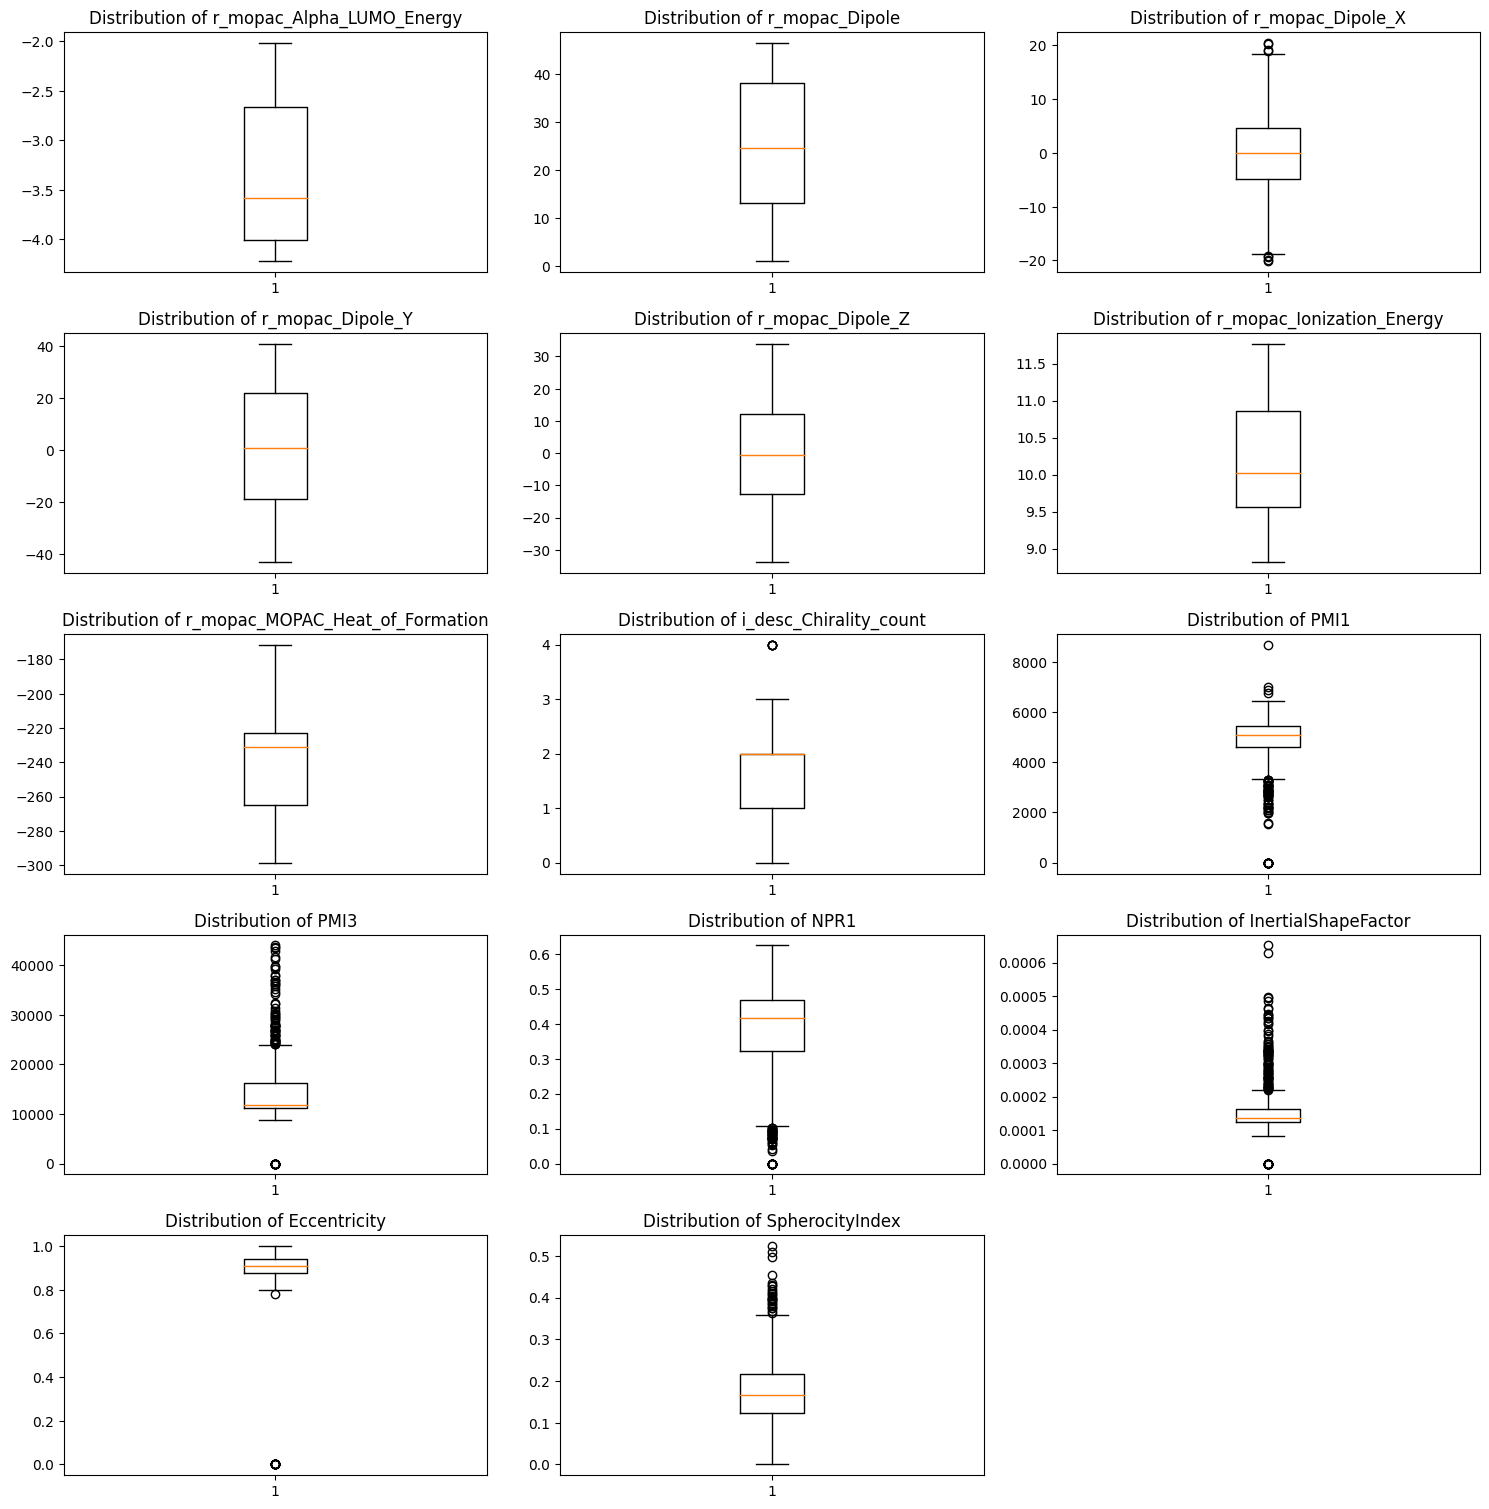

In [ ]:
# Ploteo de diagramas de caja y bigotes, incluyendo los casos atípicos
plt.figure(figsize=(15,30))
count = 1
for feature in titles:
    plt.subplot(10, 3, count)
    plt.boxplot(df_clean[feature])
    plt.title(('Distribution of ' + feature))
    count += 1

plt.tight_layout()
plt.show()

Como podemos ver, hay valores que podrían estar perjudicando al modelo, por lo que delimitamos las variables:

In [ ]:
print('Data size before cleaning: ', len(df_clean))
df_clean2 = df_clean[((df_clean['r_mopac_Dipole_X'] > -10) & (df_clean['r_mopac_Dipole_X'] < 10)) &
                  ((df_clean['PMI1'] > 4000) & (df_clean['PMI1'] < 6000)) & ((df_clean['PMI3'] > 10000) & (df_clean['PMI3'] < 13000)) &((df_clean['NPR1'] > 0.1) & (df_clean['NPR1'] < 0.6)) &
                ((df_clean['InertialShapeFactor'] > 0) & (df_clean['InertialShapeFactor'] < 0.0002)) & ((df_clean['SpherocityIndex'] > 0) & (df_clean['SpherocityIndex'] < 0.3))]
print('Data size after cleaning: ', len(df_clean2))

Data size before cleaning:  720
Data size after cleaning:  304


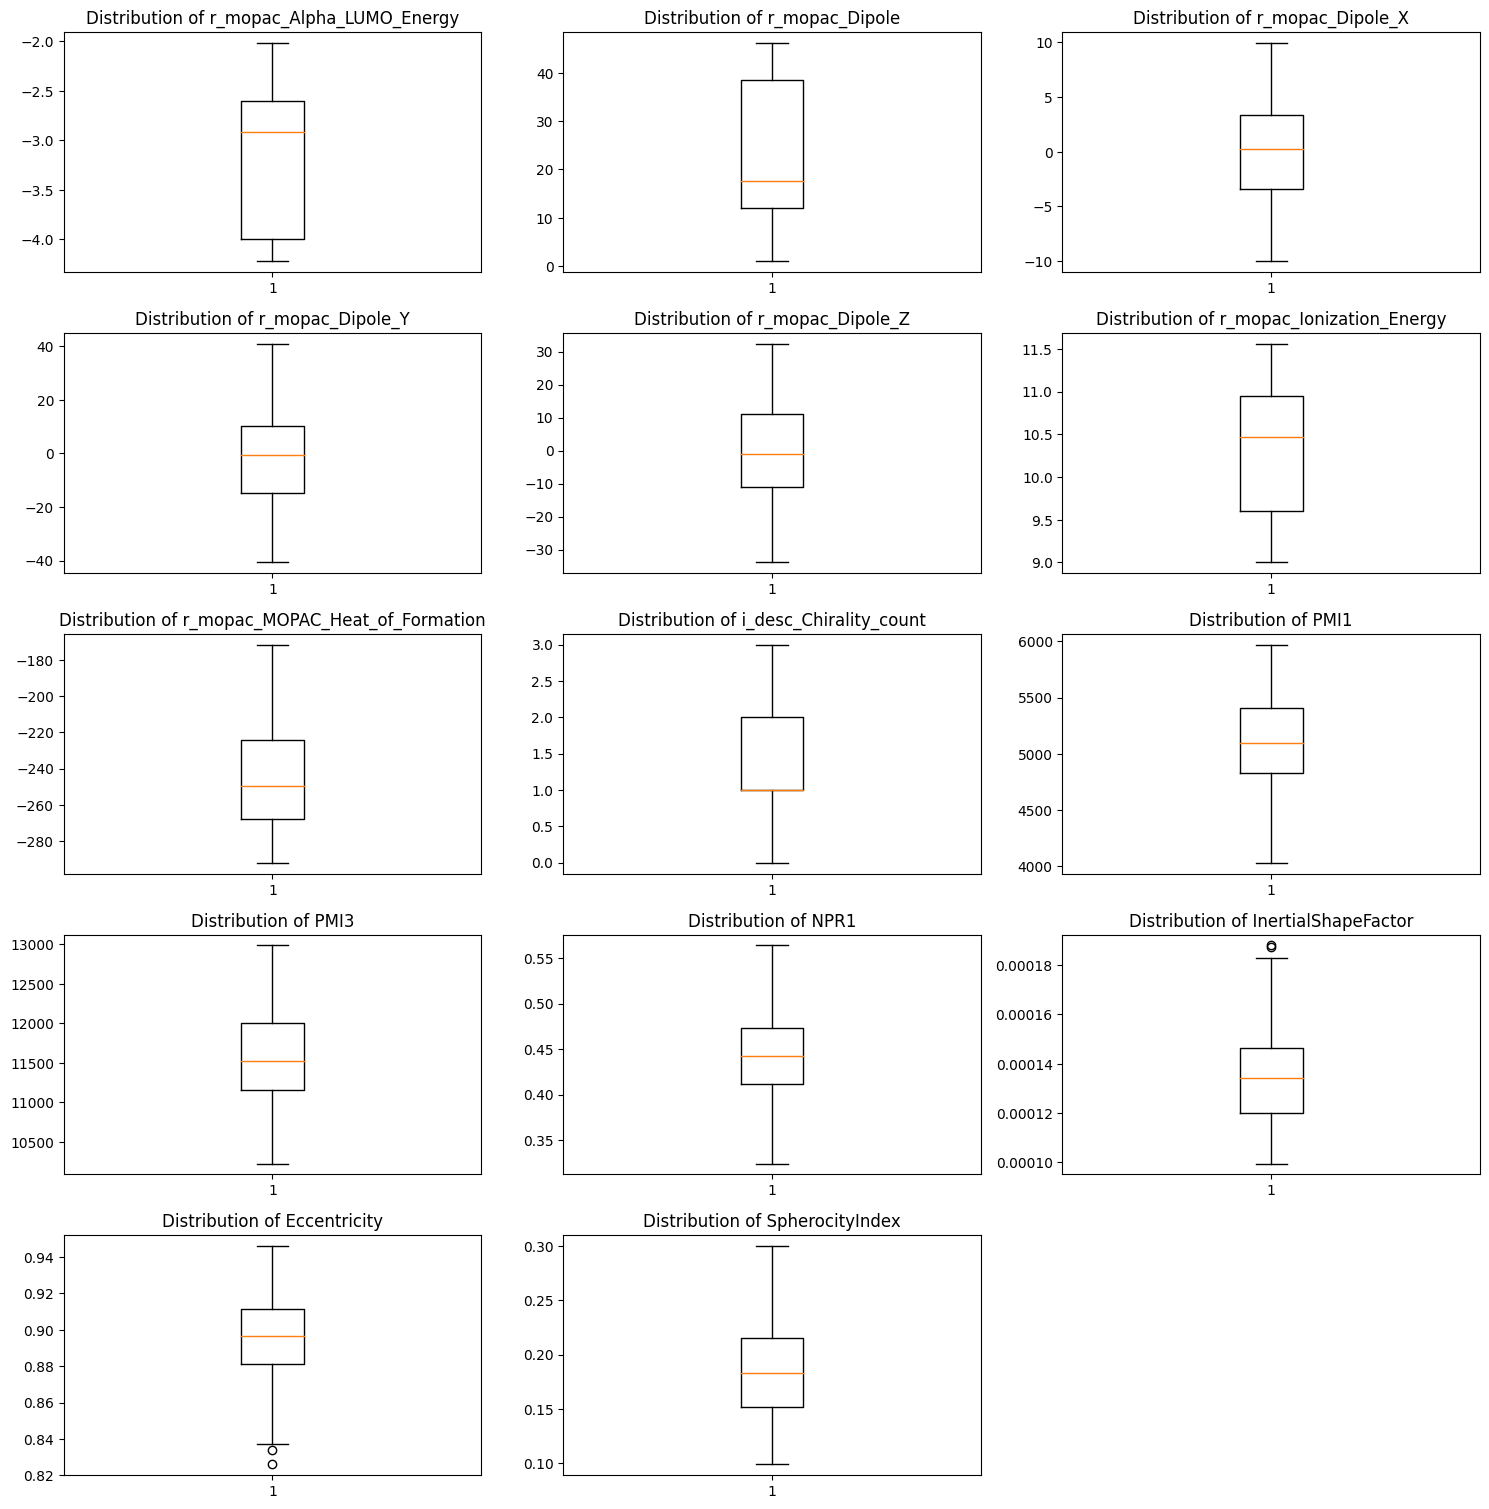

In [ ]:
# Ploteo de diagramas de caja y bigotes, excluyendo los casos atípicos
plt.figure(figsize=(15,30))
count = 1
for feature in titles:
    plt.subplot(10, 3, count)
    plt.boxplot(df_clean2[feature])
    plt.title(('Distribution of ' + feature))
    count += 1

plt.tight_layout()
plt.show()

4. Realizar un screening de modelos de ML (pycaret, lazy predict, etc)

In [ ]:
!pip -q install lazypredict

In [ ]:
from sklearn.model_selection import train_test_split # Para dividir los datos en conjuntos de entrenamiento y prueba.
from lazypredict.Supervised import LazyClassifier, LazyRegressor # Genera modelos de clasificación

# Dividir los datos en características (X) y target (y)
X = df_clean2.drop(['FEBc'], axis=1)
y = df_clean2['FEBc']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =33, test_size=0.1) # Divide en datos de prueba y entrenamiento

# Inicializar y ajustar el modelo LazyRegressor
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models


100%|██████████| 42/42 [00:03<00:00, 12.47it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 273, number of used features: 14
[LightGBM] [Info] Start training from score -9.356777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,-0.78,0.05,1.56,0.03
LinearRegression,-0.86,0.01,1.59,0.01
TransformedTargetRegressor,-0.86,0.01,1.59,0.02
Lars,-0.86,0.01,1.59,0.02
BayesianRidge,-0.89,-0.01,1.61,0.01
LassoLarsIC,-0.89,-0.01,1.61,0.02
LassoLarsCV,-0.89,-0.01,1.61,0.03
Lasso,-0.89,-0.01,1.61,0.04
LassoLars,-0.89,-0.01,1.61,0.01


5. Conclusiones

Debido a que se obtuvieron coeficientes negativos, se puede inferir que el modelo no representa eficientemente el target de la base de datos. Esto podría deberse a una selección inadecuada de variables predictoras, problemas de multicolinealidad, la presencia de datos atípicos o errores de medición, un modelo inadecuado para los datos disponibles o una combinación de estos factores.